## maybe add to gridsearch?

max_txt_len
learning rate

In [49]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
from datetime import datetime


In [50]:
filepath = './model_stats.json'


with open(filepath, 'r') as file:
    model_stats = json.load(file)

In [51]:
max_f1_score = 0
best_model = None

for model in model_stats.keys():
    f1 = model_stats[model]['f1_scores']['f1_score_3']
    if f1> max_f1_score:
        max_f1_score = f1
        best_model = model_stats[model]
        
    
pprint(best_model)

{'batch_norm': True,
 'batch_size': 512,
 'bottleneck_fc_dim': 100,
 'dropout_pctg': 0.0,
 'epochs': 10,
 'f1_scores': {'f1_score_2': 0.711202914913271,
               'f1_score_3': 0.8056600220590214,
               'f1_score_4': 0.7594258763354675},
 'filter_sizes': [1, 3, 5],
 'glove_dim': 100,
 'loss_vector': [0.028235349267468613,
                 0.022836775092755335,
                 0.021072113097219142,
                 0.020296066778443627,
                 0.019687952915743247,
                 0.01989102401470734,
                 0.019142538609014728,
                 0.01944774376638865,
                 0.019426475500024982,
                 0.019136379583407255],
 'max_txt_len': 500,
 'model': 'Model(\n'
          '  (embedding): Embedding(400000, 100)\n'
          '  (conv1): Conv2d(1, 300, kernel_size=(1, 100), stride=(1, 1))\n'
          '  (bn1): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, '
          'track_running_stats=True)\n'
          '  (conv2): Co

In [52]:
df =  pd.DataFrame(model_stats).transpose()

In [53]:
date_format = '%Y-%m-%d %H:%M:%S.%f'

def date_dist_as_sec(start, end):
    date_format = '%Y-%m-%d %H:%M:%S.%f'
    start_dt= datetime.strptime(start, date_format)
    end_dt= datetime.strptime(end, date_format)
    diff = end_dt -start_dt
    return diff.seconds


def average_score(scores):
    sum_scores = 0
    for score in scores.values():
        sum_scores += score
        
    return sum_scores / len(scores)
        

df['train_duration_seconds'] = df.apply(lambda row: date_dist_as_sec(row['train_start'], row['train_finish'])  , axis=1)
df['average_f1_score'] =df.apply(lambda row: average_score(row['f1_scores'])  , axis=1)
df['average_pAtK_score'] =df.apply(lambda row: average_score(row['pAtK_scores'])  , axis=1)



In [54]:
relevant_df = df[['batch_norm', 'bottleneck_fc_dim', 
                  'dropout_pctg', 'filter_sizes',
                  'glove_dim', 'num_filters', 
                  'train_duration_seconds', 
                  'average_f1_score', 'average_pAtK_score']]

In [55]:
relevant_df.sort_values(by=['average_f1_score'], ascending=False).head()

,batch_norm,bottleneck_fc_dim,dropout_pctg,filter_sizes,glove_dim,num_filters,train_duration_seconds,average_f1_score,average_pAtK_score
"n_flt:300, btl_dim:100, glove:100,flt_sz:[1, 3, 5],bn:True,dd_pctg:0.0",True,100,0,"[1, 3, 5]",100,300,598,0.758763,0.785623
"n_flt:300, btl_dim:100, glove:100,flt_sz:[3, 4, 5],bn:True,dd_pctg:0.0",True,100,0,"[3, 4, 5]",100,300,690,0.758185,0.785370
"n_flt:300, btl_dim:100, glove:100,flt_sz:[1, 4, 7],bn:True,dd_pctg:0.0",True,100,0,"[1, 4, 7]",100,300,680,0.757825,0.784571
"n_flt:200, btl_dim:100, glove:100,flt_sz:[1, 4, 7],bn:True,dd_pctg:0.0",True,100,0,"[1, 4, 7]",100,200,457,0.756195,0.783252
"n_flt:300, btl_dim:100, glove:100,flt_sz:[3, 4, 5],bn:False,dd_pctg:0.0",False,100,0,"[3, 4, 5]",100,300,652,0.756142,0.783070


In [56]:
relevant_df.sort_values(by=['average_pAtK_score'], ascending=False).head()

,batch_norm,bottleneck_fc_dim,dropout_pctg,filter_sizes,glove_dim,num_filters,train_duration_seconds,average_f1_score,average_pAtK_score
"n_flt:300, btl_dim:100, glove:100,flt_sz:[1, 3, 5],bn:True,dd_pctg:0.0",True,100,0,"[1, 3, 5]",100,300,598,0.758763,0.785623
"n_flt:300, btl_dim:100, glove:100,flt_sz:[3, 4, 5],bn:True,dd_pctg:0.0",True,100,0,"[3, 4, 5]",100,300,690,0.758185,0.785370
"n_flt:300, btl_dim:100, glove:100,flt_sz:[1, 4, 7],bn:True,dd_pctg:0.0",True,100,0,"[1, 4, 7]",100,300,680,0.757825,0.784571
"n_flt:200, btl_dim:100, glove:100,flt_sz:[3, 4, 5],bn:True,dd_pctg:0.0",True,100,0,"[3, 4, 5]",100,200,458,0.755859,0.783727
"n_flt:300, btl_dim:100, glove:100,flt_sz:[1, 3, 5],bn:False,dd_pctg:0.0",False,100,0,"[1, 3, 5]",100,300,543,0.755860,0.783631


In [57]:
relevant_df['dropout_pctg'].value_counts()

0.36    240
0.00    240
0.50    235
Name: dropout_pctg, dtype: int64

In [58]:
model_stats['n_flt:100, btl_dim:10, glove:50,flt_sz:[1, 3, 5],bn:False,dd_pctg:0.5']

most_overfitting_model = None
overfit_score = 0
for key, mdl in model_stats.items():
    diff = mdl['loss_vector'][-1] - mdl['train_vector'][-1]
    if diff > overfit_score:
        overfit_score = diff
        most_overfitting_model = key

Text(0.5,1,'loss vs epoch')

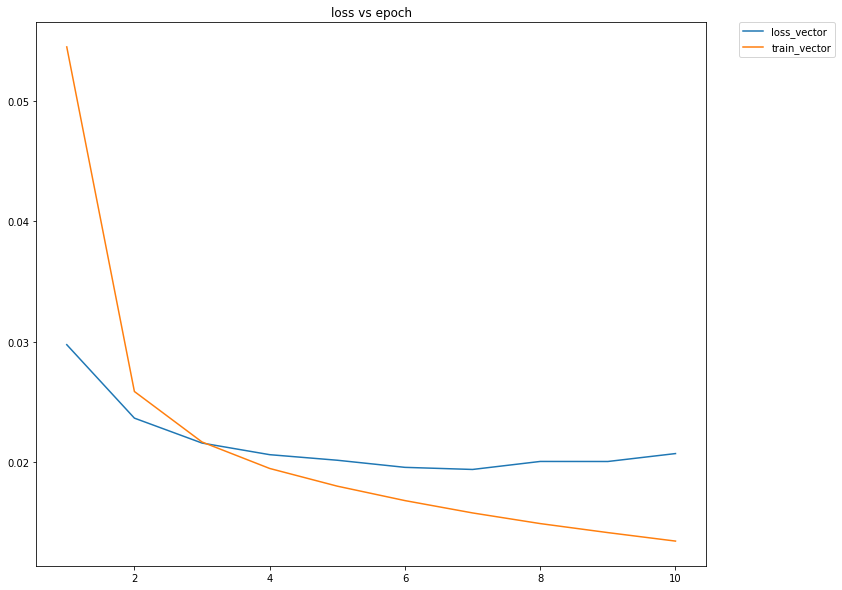

In [59]:
overfitting = model_stats[most_overfitting_model]


plt.figure(figsize=(12, 10))

lossv = overfitting['loss_vector']
trainv = overfitting['train_vector']
plt.plot(np.arange(1, len(lossv) + 1), lossv, label='loss_vector')
plt.plot(np.arange(1, len(trainv) + 1), trainv, label='train_vector')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('loss vs epoch')

In [17]:
relevant_df['train_duration_seconds'].mean()



338.3095238095238

In [18]:
338 * 90

30420

In [19]:
30420/3

10140.0

In [20]:
10140 / 60

169.0

In [ ]:
1